# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

0.7714650885502757
2.2644528905781156 0.7689133254258772
2.2684536907381476 0.7663492547821665
2.2724544908981796 0.763772917660634
2.2764552910582116 0.7611843552991124
2.2804560912182437 0.7585836091311159
2.2844568913782757 0.7559707207851772
2.2884576915383077 0.753345732084182
2.2924584916983397 0.750708685044698
2.2964592918583717 0.7480596218763039
2.3004600920184037 0.745398584980913
2.3044608921784357 0.7427256169520945
2.3084616923384678 0.7400407605743917
2.3124624924984998 0.737344058822638
2.316463292658532 0.7346355548612675
2.320464092818564 0.7319152920436256
2.324464892978596 0.7291833139112741
2.328465693138628 0.7264396641932949
2.33246649329866 0.7236843868055892
2.336467293458692 0.7209175258501758
2.340468093618724 0.7181391256144839
2.344468893778756 0.7153492305706451
2.348469693938788 0.7125478853747813
2.35247049409882 0.7097351348662898
2.356471294258852 0.7069110240671256
2.360472094418884 0.704075598181081
2.364472894578916 0.7012289025930617
2.368473694738

-0.9539626686136076
5.021004200840168 -0.952755095606196
5.0250050010002 -0.9515322724381341
5.029005801160232 -0.9502942186823948
5.033006601320264 -0.9490409541557377
5.037007401480296 -0.9477724989183918
5.041008201640328 -0.9464888732737343
5.04500900180036 -0.9451900977679658
5.049009801960392 -0.9438761931897812
5.053010602120424 -0.9425471805700375
5.057011402280456 -0.9412030811814163
5.061012202440488 -0.9398439165380839
5.06501300260052 -0.9384697083953468
5.069013802760552 -0.9370804787493037
5.073014602920584 -0.9356762498364929
5.077015403080616 -0.9342570441335367
5.081016203240648 -0.932822884356782
5.08501700340068 -0.9313737934619356
5.089017803560712 -0.929909794643698
5.093018603720744 -0.9284309113353916
5.097019403880776 -0.9269371672085852
5.101020204040808 -0.925428586172716
5.10502100420084 -0.9239051923747058
5.109021804360872 -0.9223670101985759
5.113022604520904 -0.9208140642650555
5.117023404680936 -0.9192463794311881
5.121024204840968 -0.9176639807899338
5.

0.999865291349081
7.841568313662733 0.9999229557287426
7.845569113822765 0.999964614961034
7.849569913982797 0.9999902683791416
7.853570714142829 0.9999999155724472
7.857571514302861 0.999993556386534
7.861572314462893 0.9999711909231896
7.865573114622925 0.9999328195404042
7.869573914782957 0.9998784428523647
7.873574714942989 0.999808061729445
7.877575515103021 0.9997216772981923
7.881576315263053 0.9996192909413084
7.885577115423085 0.9995009042976286
7.889577915583117 0.9993665192620944
7.893578715743149 0.9992161379857238
7.897579515903181 0.9990497628755769
7.901580316063213 0.9988673965947168
7.905581116223245 0.9986690420621678
7.909581916383277 0.9984547024528679
7.913582716543309 0.9982243811976187
7.917583516703341 0.9979780819830295
7.921584316863373 0.9977158087514595
7.925585117023405 0.9974375657009539
7.929585917183437 0.9971433572851767
7.933586717343469 0.9968331882133398
7.937587517503501 0.9965070634501274
7.941588317663533 0.9961649882156166
7.945589117823565 0.995

10.434086817363474 -0.8464640503598678
10.438087617523506 -0.8485874798122605
10.442088417683538 -0.8506973264505043
10.44608921784357 -0.8527935565035909
10.450090018003602 -0.8548761364184644
10.454090818163634 -0.8569450328605581
10.458091618323666 -0.8590002127143281
10.462092418483698 -0.8610416430837837
10.46609321864373 -0.8630692912930132
10.47009401880376 -0.8650831248867072
10.474094818963792 -0.8670831116306803
10.478095619123824 -0.8690692195123827
10.482096419283856 -0.8710414167414158
10.486097219443888 -0.8729996717500402
10.49009801960392 -0.874943953193681
10.494098819763952 -0.8768742299514295
10.498099619923984 -0.8787904711265412
10.502100420084016 -0.8806926460469306
10.506101220244048 -0.8825807242656623
10.51010202040408 -0.8844546755614374
10.514102820564112 -0.8863144699390785
10.518103620724144 -0.8881600776300088
10.522104420884176 -0.8899914690927295
10.526105221044208 -0.8918086150132918
10.53010602120424 -0.8936114863057664
10.534106821364272 -0.8954000541


13.390678135627125 0.7340777198992903
13.394678935787157 0.7367886428953763
13.398679735947189 0.7394877725720443
13.402680536107221 0.7421750657259978
13.406681336267253 0.7448504793433995
13.410682136427285 0.747513970600561
13.414682936587317 0.7501654968646276
13.418683736747349 0.7528050156942608
13.422684536907381 0.7554324848403178
13.426685337067413 0.7580478622465273
13.430686137227445 0.7606511060501634
13.434686937387477 0.7632421745827149
13.43868773754751 0.7658210263705529
13.442688537707541 0.7683876201355943
13.446689337867573 0.7709419147959624
13.450690138027605 0.7734838694666448
13.454690938187637 0.7760134434601477
13.45869173834767 0.7785305962871469
13.462692538507701 0.7810352876571367
13.466693338667733 0.7835274774790734
13.470694138827765 0.7860071258620185
13.474694938987797 0.7884741931157762
13.47869573914783 0.7909286397515292
13.482696539307861 0.7933704264824705
13.486697339467893 0.7957995142244324
13.490698139627925 0.7982158640965122
13.494698939787

-0.43970427013872
16.167233446689337 -0.4432940306290878
16.17123424684937 -0.4468766955864969
16.1752350470094 -0.4504522076654485
16.179235847169434 -0.4540205096349356
16.183236647329466 -0.45758154437935883
16.187237447489498 -0.4611352548994409
16.19123824764953 -0.4646815843131387
16.19523904780956 -0.4682204758565541
16.199239847969594 -0.47175187288484216
16.203240648129626 -0.4752757188731182
16.207241448289658 -0.47879195741736225
16.21124224844969 -0.48230053223532193
16.21524304860972 -0.4858013871674135
16.219243848769754 -0.48929446617762057
16.223244648929786 -0.49277971335439114
16.227245449089818 -0.49625707291153254
16.23124624924985 -0.4997264891891043
16.23524704940988 -0.5031879066543091
16.239247849569914 -0.5066412699023818
16.243248649729946 -0.5100865236574759
16.247249449889978 -0.5135236127735485
16.25125025005001 -0.5169524822352435
16.255251050210042 -0.520373077158771
16.259251850370074 -0.5237853427927872
16.263252650530106 -0.5271892245192695
16.26725345

18.807761552310463 -0.041782202770769945
18.811762352470495 -0.03778457261239891
18.815763152630527 -0.03378633765977897
18.81976395279056 -0.029787561910180366
18.82376475295059 -0.025788309369529572
18.827765553110623 -0.021788644051384753
18.831766353270655 -0.017788629975911144
18.835767153430687 -0.013788331168856315
18.83976795359072 -0.009787811660525373
18.84376875375075 -0.005787135484756042
18.847769553910783 -0.0017863666778937322
18.851770354070815 0.0022144307222334617
18.855771154230847 0.00621519267733977
18.85977195439088 0.010215855149706767
18.86377275455091 0.01421635410320839
18.867773554710944 0.018216625504335917
18.871774354870976 0.022216605323222918
18.875775155031008 0.02621622953467014
18.87977595519104 0.030215434119170315
18.88377675535107 0.03421415506393289
18.887777555511104 0.03821232836390862
18.891778355671136 0.0422098900228141
18.895779155831168 0.04620677605415604
18.8997799559912 0.050202922482255545
18.90378075615123 0.054198265343272066
18.90778

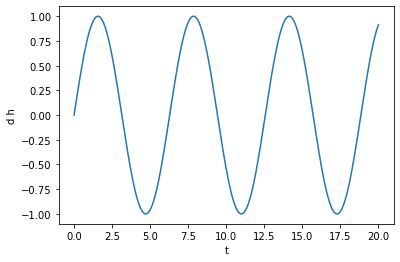

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

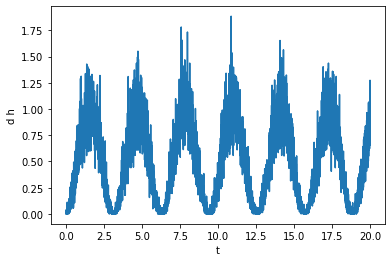

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

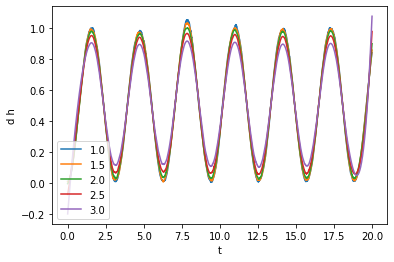

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

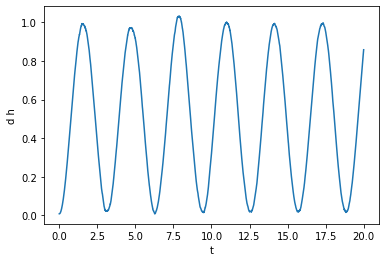

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.2148


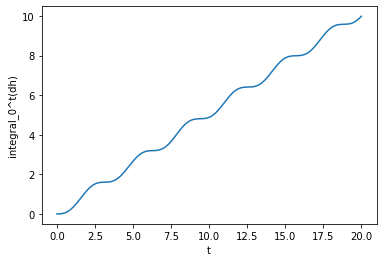

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

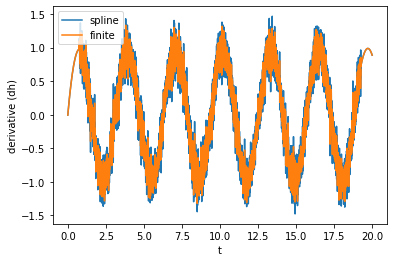

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

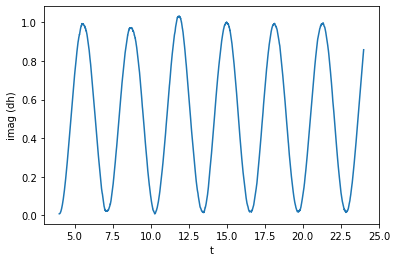

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

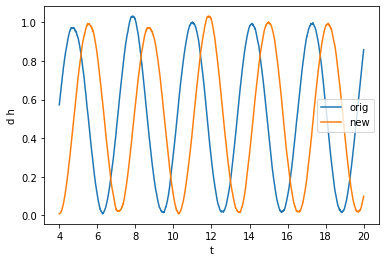

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

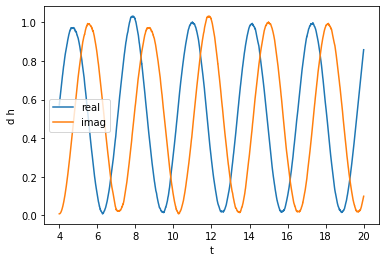

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

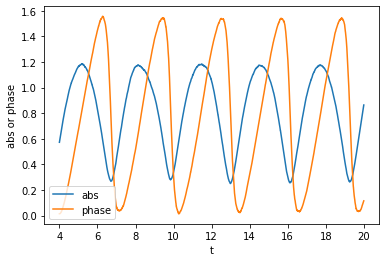

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

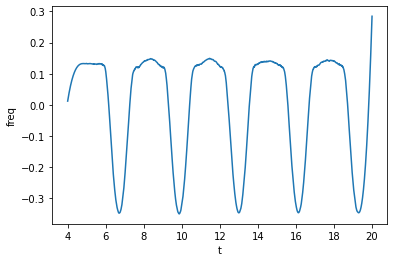

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

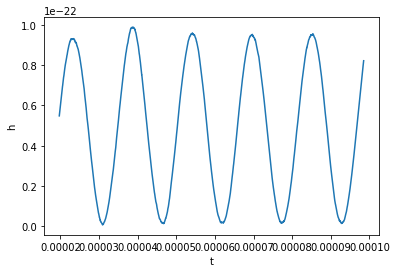

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

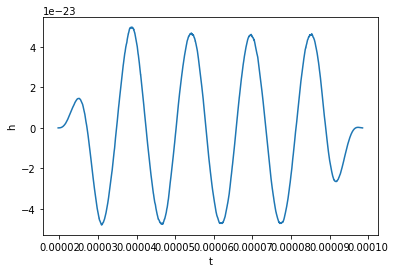

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

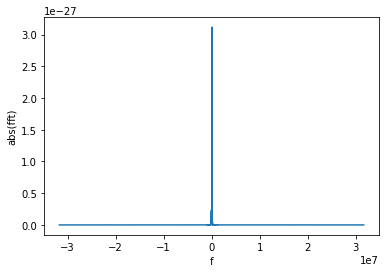

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

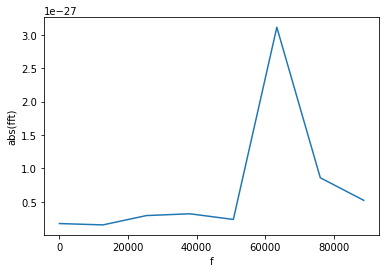

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64203.12


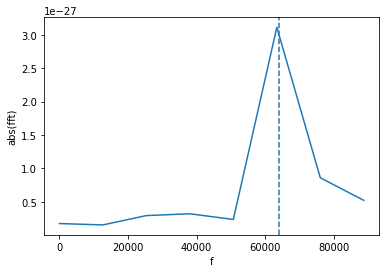

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.115e-27
Maximum with mask 8.587e-28
Length with mask 8
Length after having removed the masked points 7
